***Ex. 1.*** Pe baza definiţiei unui model Markov ascuns, demonstraţi formula recurenţei pentru variabila forward de la
pagina 23 a cursului 4. Încărcaţi argumentul fie în Markdown/Latex, fie ca foto la foia de lucru.

Pentru
$$
\alpha_t(j) = P(o_1, o_2, \dots, o_t, S_t = q_j | \lambda)
$$

putem aplica urmatoarele proprietati:


$\star$ Proprietatea Markov: probabilitatea starii curente $q_t$ depinde numai de starea anterioara $q_{t-1}$ 

$\star$ Formula probabilitatii totale $P(A) = P(A | B_1)P(B_1) + P(A | B_2)P(B_2) + \dots + P(A | B_n)P(B_n),$ pentru $(B_1, B_2, \dots, B_n)$ partitie a evenimentului sigur $\Omega$

pentru a obtine:
$$
\alpha_t(j) = \sum_{i} P(o_1, \dots, o_t, S_t = q_j | S_{t-1} = q_i, \lambda) \cdot P(S_{t-1} = q_i | \lambda)
$$

Aplicand regula lantului:

$$
\alpha_t(j) = \sum_{i} P(o_t | S_t = q_j, \lambda) \cdot P(S_t = q_j | S_{t-1} = q_i, \lambda) \cdot P(o_1, \dots, o_{t-1}, S_{t-1} = q_i | \lambda)
$$

Observam ca, din definitie/notatie:
- $P(o_1, \dots, o_{t-1}, S_{t-1} = q_i | \lambda) = \alpha_{t-1}(i)$
- $P(S_t = q_j | S_{t-1} = q_i, \lambda) = a_{ij}$
- $P(o_t | S_t = q_j, \lambda) = b_j(o_t)$

Deci inlocuind obtinem ceea ce trebuia demonstrat

$$
\alpha_t(j) = \sum_{i} b_j(o_t) \cdot a_{ij} \cdot \alpha_{t-1}(i) = \left[\sum_{i} \alpha_{t-1}(i)a_{ij}\right]b_j(o_t) \quad \blacksquare
$$

***Ex. 2***

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

states = ["dificil", "mediu", "usor"]
n_states = len(states)

observations = ["FB", "B", "S", "NS"]
n_observations = len(observations)

start_probability = [1/3, 1/3, 1/3]
transition_probability = np.array([
    [0, 0.5, 0.5],
    [0.5, 0.25, 0.25],
    [0.5, 0.25, 0.25]
])

emission_probability = np.array([
    [0.1, 0.2, 0.4, 0.3],
    [0.15, 0.25, 0.5, 0.1],
    [0.2, 0.3, 0.4, 0.1]
])

model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

model

CategoricalHMM(n_components=3)

Most likely hidden states: ['usor', 'usor', 'dificil', 'usor', 'dificil', 'mediu', 'dificil', 'usor', 'dificil', 'usor', 'dificil', 'mediu']


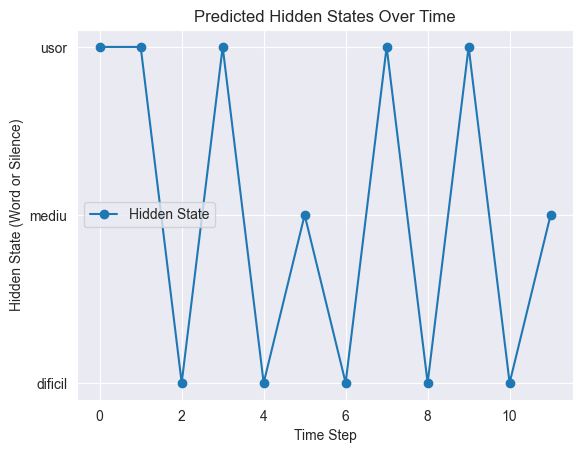

In [21]:
observations_sequence = np.array([0, 0, 2, 1, 1, 2, 1, 1, 3, 1, 1, 2]).reshape(-1, 1)
hidden_states_indices = model.predict(observations_sequence)
hidden_states = [states[index] for index in hidden_states_indices]
print("Most likely hidden states:", hidden_states)

# Plot the results for visualization
sns.set_style("darkgrid")
plt.plot(hidden_states_indices, '-o', label="Hidden State")
plt.xlabel("Time Step")
plt.ylabel("Hidden State (Word or Silence)")
plt.yticks(ticks=range(n_states), labels=states)
plt.legend()
plt.title("Predicted Hidden States Over Time")
plt.show()

In [ ]:
def viterbi_algorithm(observations, states, start_probability, trans_probability, emit_probability, obs_sequence):
    n_states = len(states)
    
    #we convert observations to indices, probably kindof unnecessary since I altered the previous code but it is what it is
    print(obs_sequence)
    obs_indices = [observations.index(obs) for obs in obs_sequence]
    
    viterbi = np.zeros((len(obs_sequence), n_states))
    path = np.zeros((len(obs_sequence), n_states), dtype=int)
    
    #initialize base cases (t == 0)
    for s in range(n_states):
        viterbi[0, s] = start_probability[s] * emit_probability[s, obs_indices[0]]
        path[0, s] = s
    
    #run Viterbi for t > 0
    for t in range(1, len(obs_sequence)):
        for s in range(n_states):
            prob, state = max(
                (viterbi[t - 1, s_prev] * trans_probability[s_prev, s] * emit_probability[s, obs_indices[t]], s_prev)
                for s_prev in range(n_states)
            )
            viterbi[t, s] = prob
            path[t, s] = state

    #backtrack to find the best path
    best_path = [0] * len(obs_sequence)
    best_path[-1] = np.argmax(viterbi[-1, :])
    for t in range(len(obs_sequence) - 2, -1, -1):
        best_path[t] = path[t + 1, best_path[t + 1]]
    
    #then convert indices back to state names
    best_state_sequence = [states[i] for i in best_path]
    best_prob = viterbi[-1, best_path[-1]]
    
    return best_state_sequence, best_prob

observations_sequence_strings = ["FB", "FB", "S", "B", "B", "S", "B", "B", "NS", "B", "B", "S"]
seq, prob = viterbi_algorithm(observations, states, start_probability, transition_probability, emission_probability, observations_sequence_strings)
print(seq)
print(prob)

['FB', 'FB', 'S', 'B', 'B', 'S', 'B', 'B', 'NS', 'B', 'B', 'S']
['usor', 'usor', 'dificil', 'usor', 'dificil', 'mediu', 'dificil', 'usor', 'dificil', 'usor', 'dificil', 'mediu']
2.1093750000000005e-11
